# PRISM Demo

This interactive notebook demonstrates the capabilities of our natural language image restoration system. You can input prompts like "Can you dehaze this image?" or "Remove haze and snow from this image" and the system will automatically:

1. Parse your natural language prompt
2. Map it to the appropriate restoration task(s)
3. Process the image using our unified restoration model
4. Display the results

## Key Features:
- **Single Distortion Removal**: Handle individual problems like haze, snow, rain, blur, etc.
- **Compound Restoration**: Process multiple distortions simultaneously 
- **Controllable Processing**: Apply restorations sequentially for fine control
- **Real-world Applications**: Handle complex scenarios like underwater distortion

Let's explore these capabilities step by step!

## Setup and Imports
First, let's import the necessary libraries and set up our environment for running the demo and displaying results.

In [ ]:
import subprocess
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display
import glob

# Set up paths
print("Setting up environment...")
print(f"Current working directory: {os.getcwd()}")

# Check if modules/demo.py exists
if os.path.exists('modules/demo.py'):
    print("modules/demo.py found!")
else:
    print("modules/demo.py not found - make sure you're in the correct directory")

# Check if demo images exist
demo_dir = "data/demo/"
if os.path.exists(demo_dir):
    demo_images = os.listdir(demo_dir)
    print(f"Found {len(demo_images)} demo images: {demo_images}")
else:
    print("Demo images directory not found")

# Create results directory if it doesn't exist
os.makedirs("demo_results", exist_ok=True)
print("Demo results directory ready")

def run_demo_and_display(img_path, prompt, display_results=True):
    """
    Run the modules/demo.py script with given parameters and optionally display results
    """
    print(f"\nRunning: python -m modules.demo --img_path {img_path} --prompt \"{prompt}\"")
    
    # Run the demo script
    result = subprocess.run([
        'python', '-m', 'modules.demo', 
        '--img_path', img_path,
        '--prompt', prompt
    ], capture_output=True, text=True)
    
    print("STDOUT:", result.stdout)
    if result.stderr:
        print("STDERR:", result.stderr)
    
    if display_results:
        # Display original image
        if os.path.exists(img_path):
            print(f"\n📸 Original Image: {img_path}")
            display(Image(img_path, width=400))
        
        # Find and display the most recent output
        output_files = glob.glob("demo_results/*.png") + glob.glob("demo_results/*.jpg")
        if output_files:
            # Get the most recently created file
            latest_output = max(output_files, key=os.path.getctime)
            print(f"\n✨ Restored Image: {latest_output}")
            display(Image(latest_output, width=400))
        else:
            print("No output images found in demo_results/")
    
    return result

print("Setup complete! Ready to run demos.")

## Single Distortion Removal - Dehazing

Let's start with a simple case: removing haze from an image. Our system can understand natural language prompts like "Can you dehaze this image?" and automatically map them to the appropriate restoration task.


🚀 Running: demo_nlp.py --img_path data/real_demo/haze.png --prompt "Can you dehaze this image?"
STDOUT: 🎯 Natural Language Image Restoration Demo
📝 Input prompt: 'Can you dehaze this image?'
✅ Mapped to distortion type: dehaze

🚀 Running inference with command:
python infer.py --unified_checkpoint_path pre-trained/unified_checkpoint.pt --distortion_type dehaze --img_path data/real_demo/haze.png --save_root demo_results --num_inference_steps 20 --seed 42 --clip_path pre-trained/clip_vision_model.pt

Processing dehaze distortion...
Using unified checkpoint loading...
Loading unified checkpoint from: pre-trained/unified_checkpoint.pt
Loading CLIP model from .pt file: pre-trained/clip_vision_model.pt
Successfully loaded CLIP model from .pt file
✓ Successfully loaded dehaze models from unified checkpoint
Running PRISM inference...
Processing complete!
  - Distortion type: dehaze
  - Input: data/real_demo/haze.png
  - Output: demo_results/dehaze_haze.png

🎉 Success! Check the output in: dem

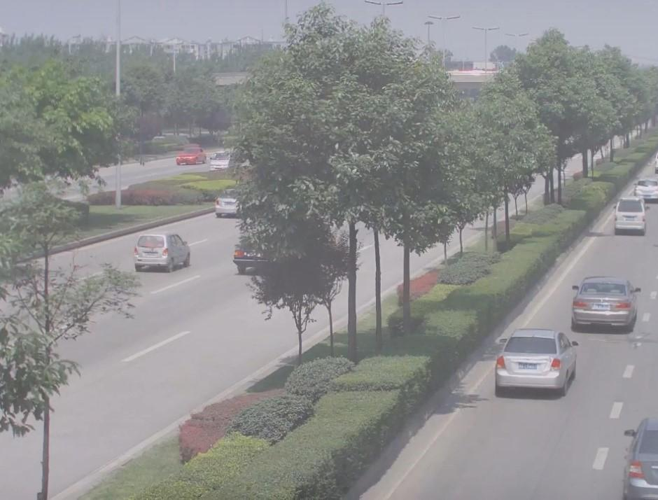


✨ Restored Image: demo_results/dehaze_haze.png


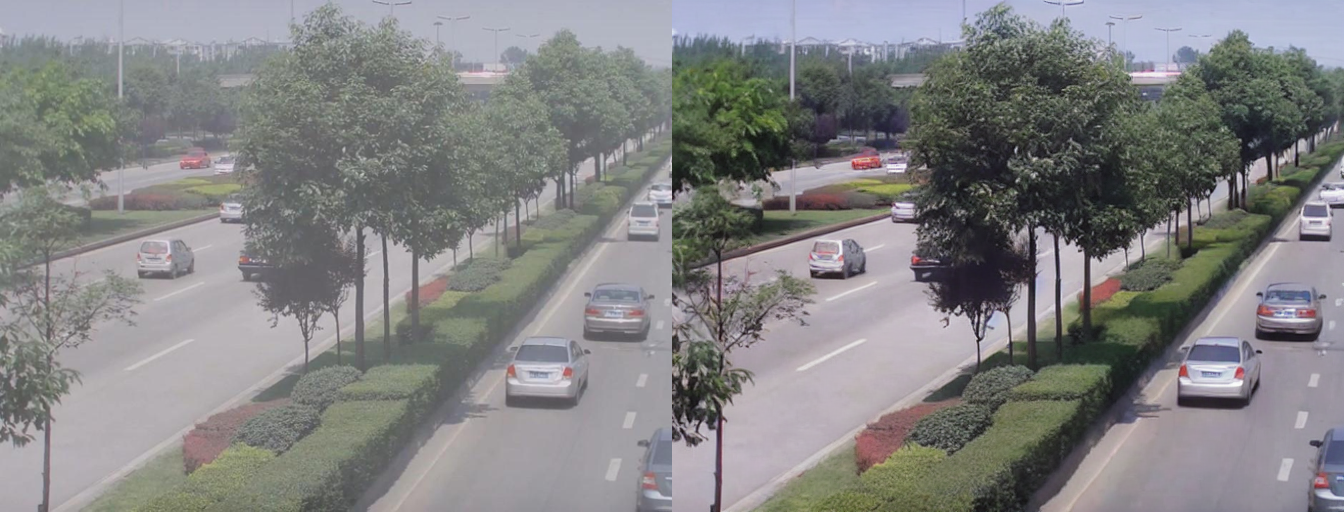


📊 Notice how the system:
1. Parsed the natural language prompt
2. Mapped 'dehaze' to the appropriate restoration model
3. Processed the image to remove atmospheric haze
4. Preserved image quality while enhancing visibility


In [2]:
# Dehaze demonstration
result = run_demo_and_display(
    img_path="data/real_demo/haze.png",
    prompt="Can you dehaze this image?"
)

print("\n📊 Notice how the system:")
print("1. Parsed the natural language prompt")
print("2. Mapped 'dehaze' to the appropriate restoration model")
print("3. Processed the image to remove atmospheric haze")
print("4. Preserved image quality while enhancing visibility")

## Single Distortion Removal - Snow Removal

Next, let's try removing snow from a winter scene. The system understands various ways to express this task.


🚀 Running: demo_nlp.py --img_path data/real_demo/snow.jpg --prompt "I want to remove snow from this wintry scene."
STDOUT: 🎯 Natural Language Image Restoration Demo
📝 Input prompt: 'I want to remove snow from this wintry scene.'
✅ Mapped to distortion type: desnow

🚀 Running inference with command:
python infer.py --unified_checkpoint_path pre-trained/unified_checkpoint.pt --distortion_type desnow --img_path data/real_demo/snow.jpg --save_root demo_results --num_inference_steps 20 --seed 42 --clip_path pre-trained/clip_vision_model.pt

Processing desnow distortion...
Using unified checkpoint loading...
Loading unified checkpoint from: pre-trained/unified_checkpoint.pt
Loading CLIP model from .pt file: pre-trained/clip_vision_model.pt
Successfully loaded CLIP model from .pt file
✓ Successfully loaded desnow models from unified checkpoint
Running PRISM inference...
Processing complete!
  - Distortion type: desnow
  - Input: data/real_demo/snow.jpg
  - Output: demo_results/desnow_snow.jp

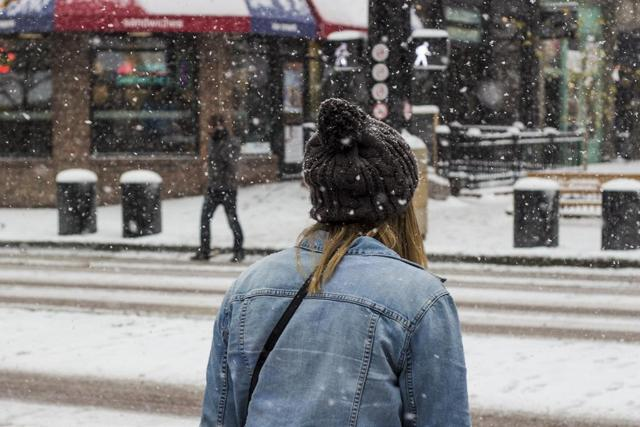


✨ Restored Image: demo_results/desnow_snow.jpg


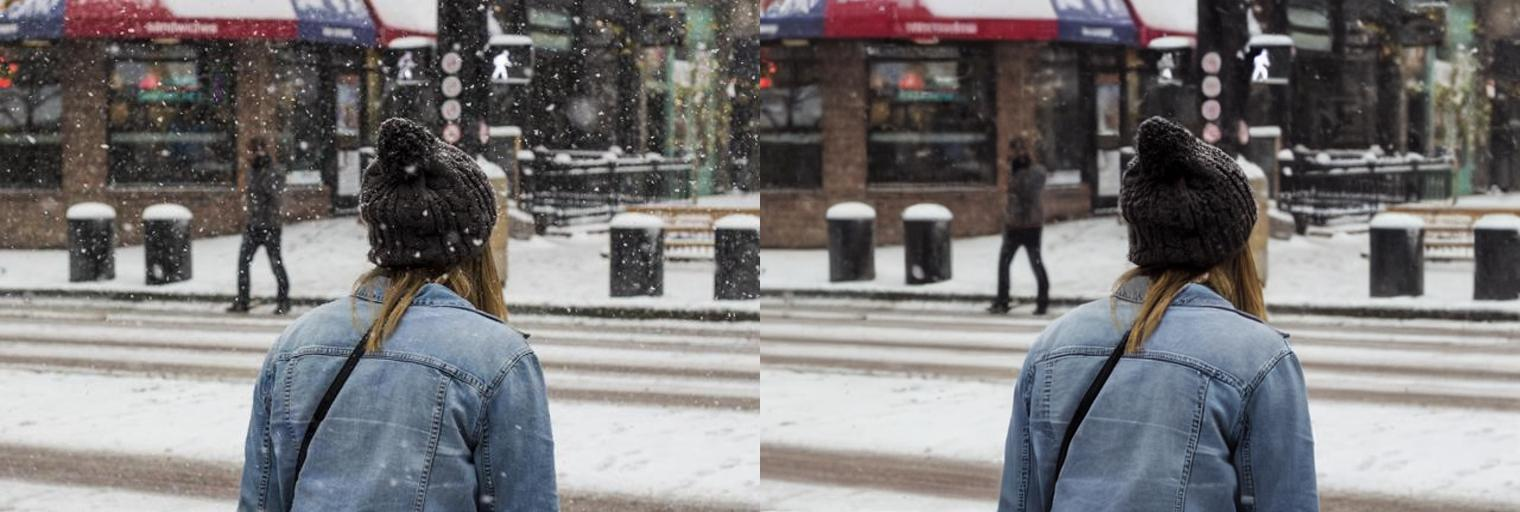


❄️ Snow removal capabilities:
• Identifies and removes snow particles and streaks
• Restores underlying scene details
• Maintains natural color balance
• Works with various snow densities and patterns


In [3]:
# Snow removal demonstration
result = run_demo_and_display(
    img_path="data/real_demo/snow.jpg",
    prompt="I want to remove snow from this wintry scene."
)

print("\n❄️ Snow removal capabilities:")
print("• Identifies and removes snow particles and streaks")
print("• Restores underlying scene details")
print("• Maintains natural color balance")
print("• Works with various snow densities and patterns")

## Single Distortion Removal - Low Light Enhancement

Now let's enhance a low-light image. The system can understand brightness-related requests in natural language.


🚀 Running: demo_nlp.py --img_path data/real_demo/lowlight.jpg --prompt "Brighten this picture."
STDOUT: 🎯 Natural Language Image Restoration Demo
📝 Input prompt: 'Brighten this picture.'
✅ Mapped to distortion type: lowlight

🚀 Running inference with command:
python infer.py --unified_checkpoint_path pre-trained/unified_checkpoint.pt --distortion_type lowlight --img_path data/real_demo/lowlight.jpg --save_root demo_results --num_inference_steps 20 --seed 42 --clip_path pre-trained/clip_vision_model.pt

Processing lowlight distortion...
Using unified checkpoint loading...
Loading unified checkpoint from: pre-trained/unified_checkpoint.pt
Loading CLIP model from .pt file: pre-trained/clip_vision_model.pt
Successfully loaded CLIP model from .pt file
✓ Successfully loaded lowlight models from unified checkpoint
Running PRISM inference...
Processing complete!
  - Distortion type: lowlight
  - Input: data/real_demo/lowlight.jpg
  - Output: demo_results/lowlight_lowlight.jpg

🎉 Success! Chec

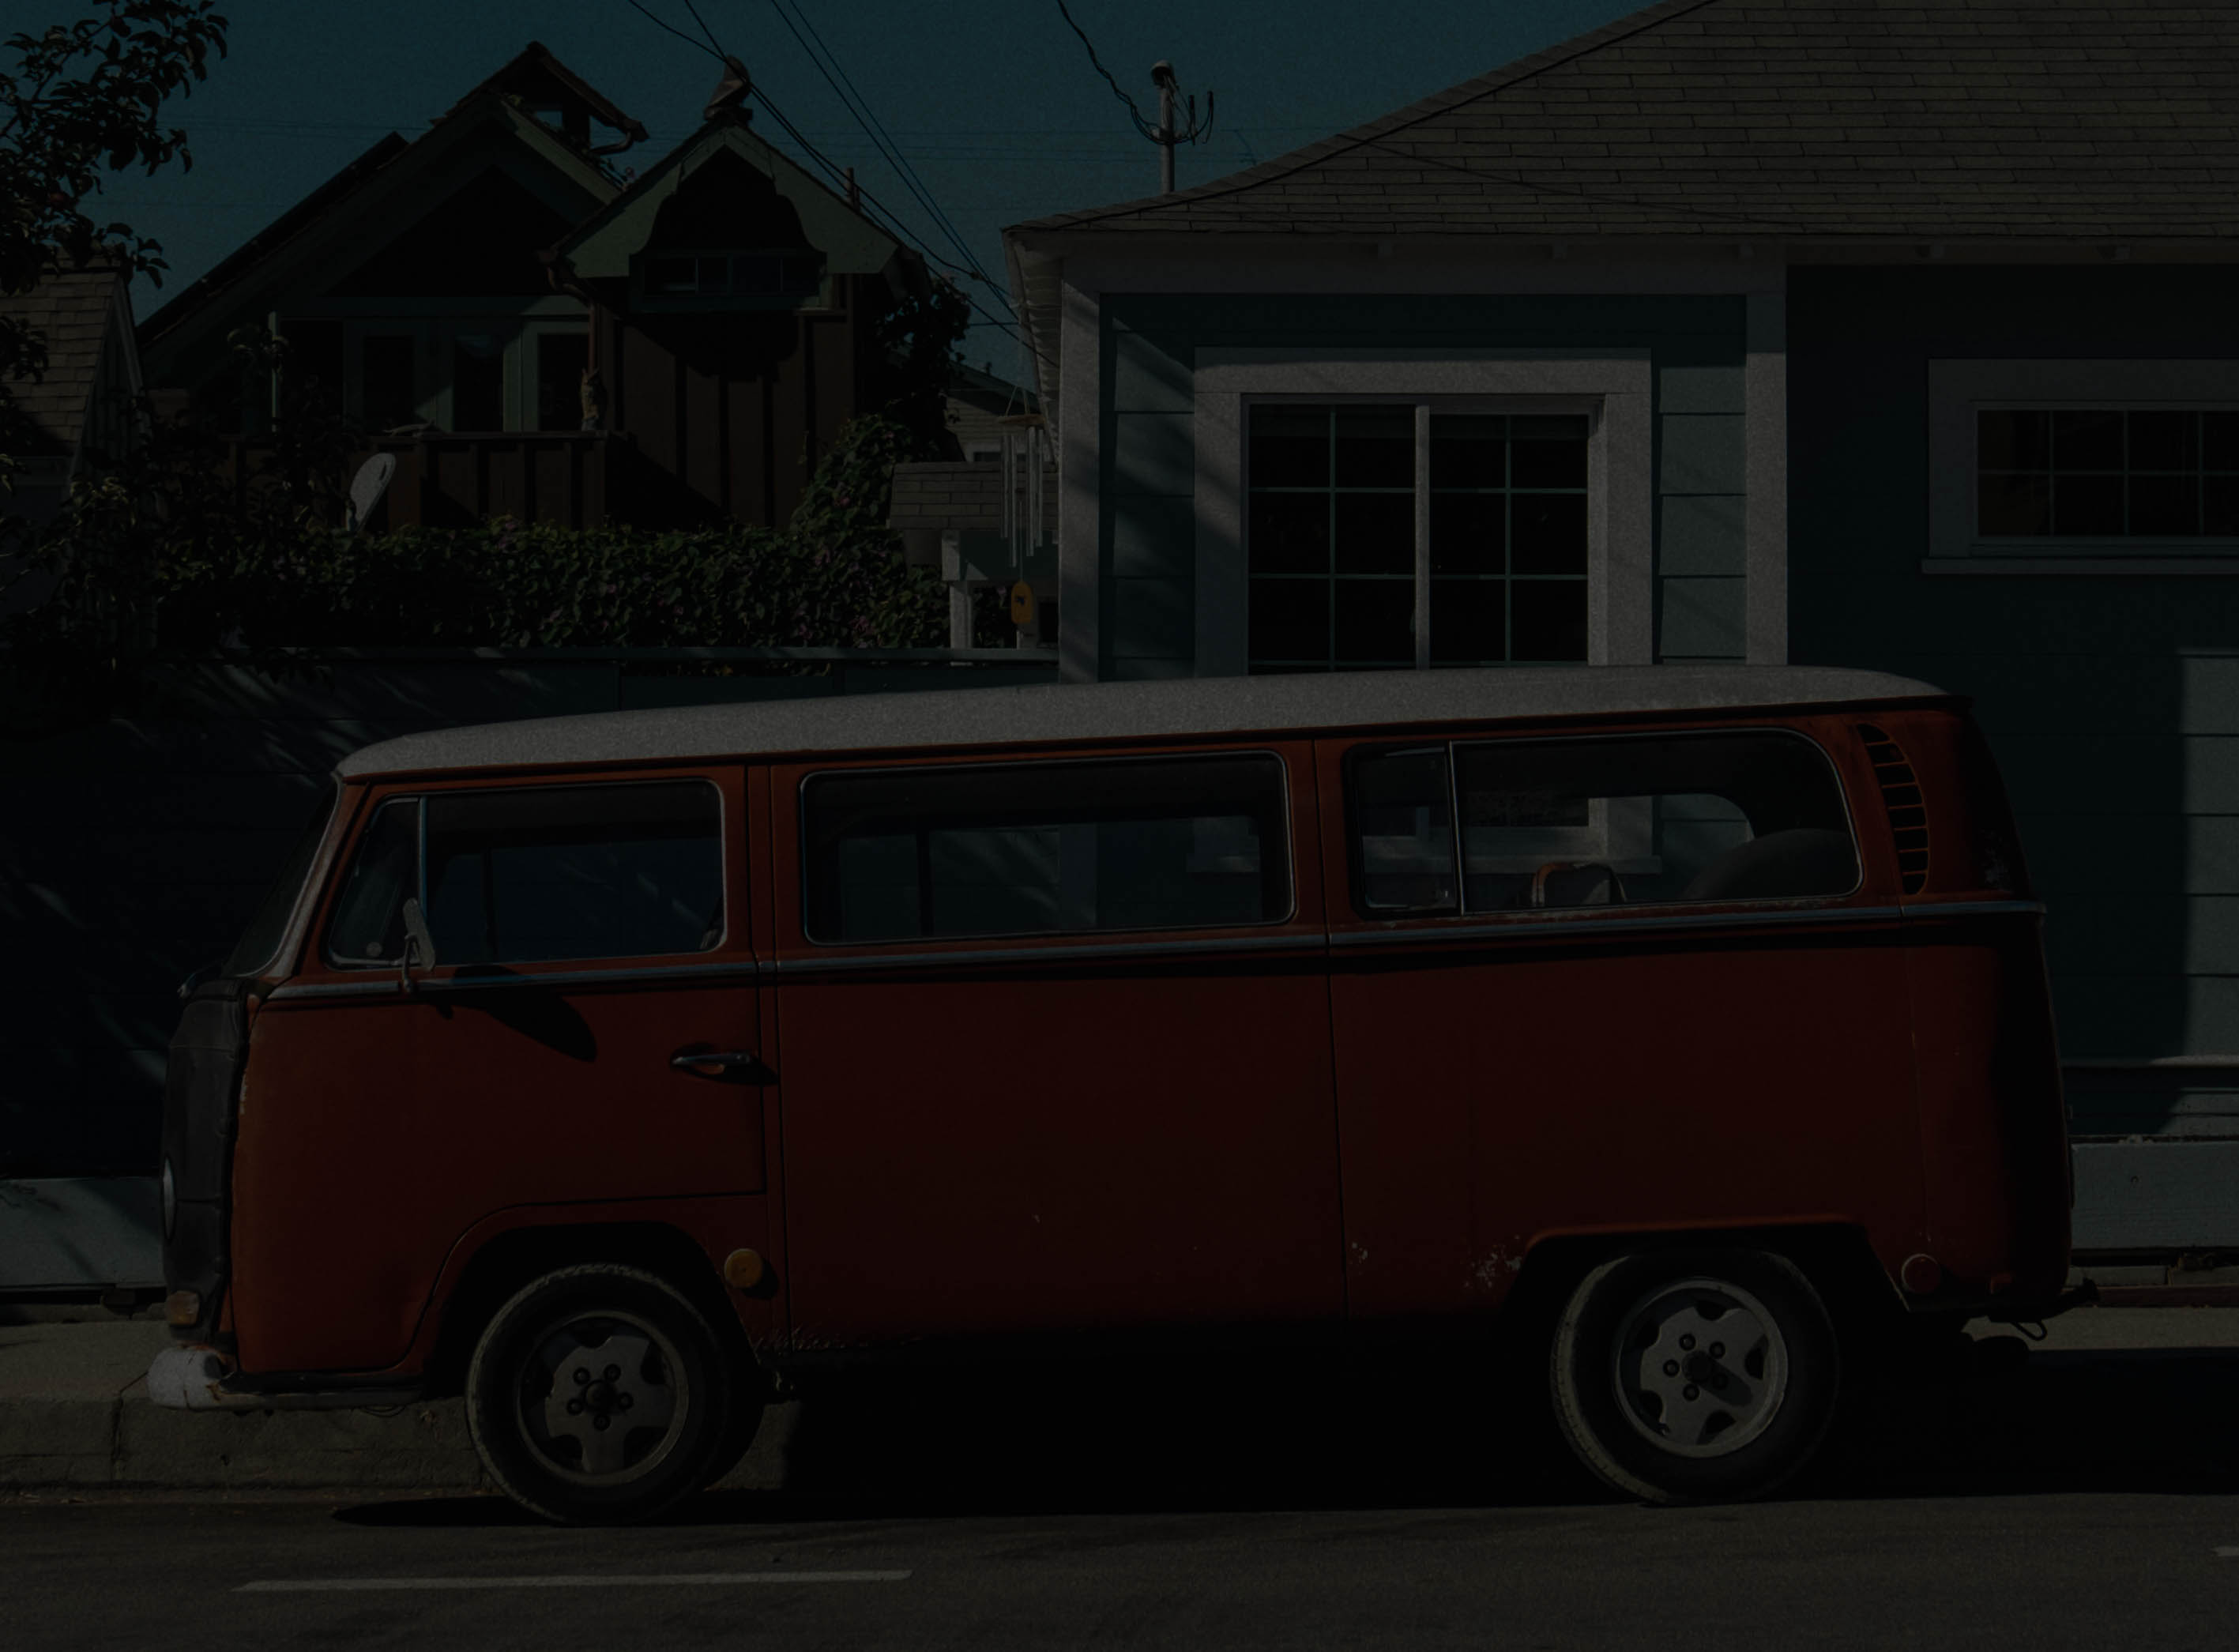


✨ Restored Image: demo_results/lowlight_lowlight.jpg


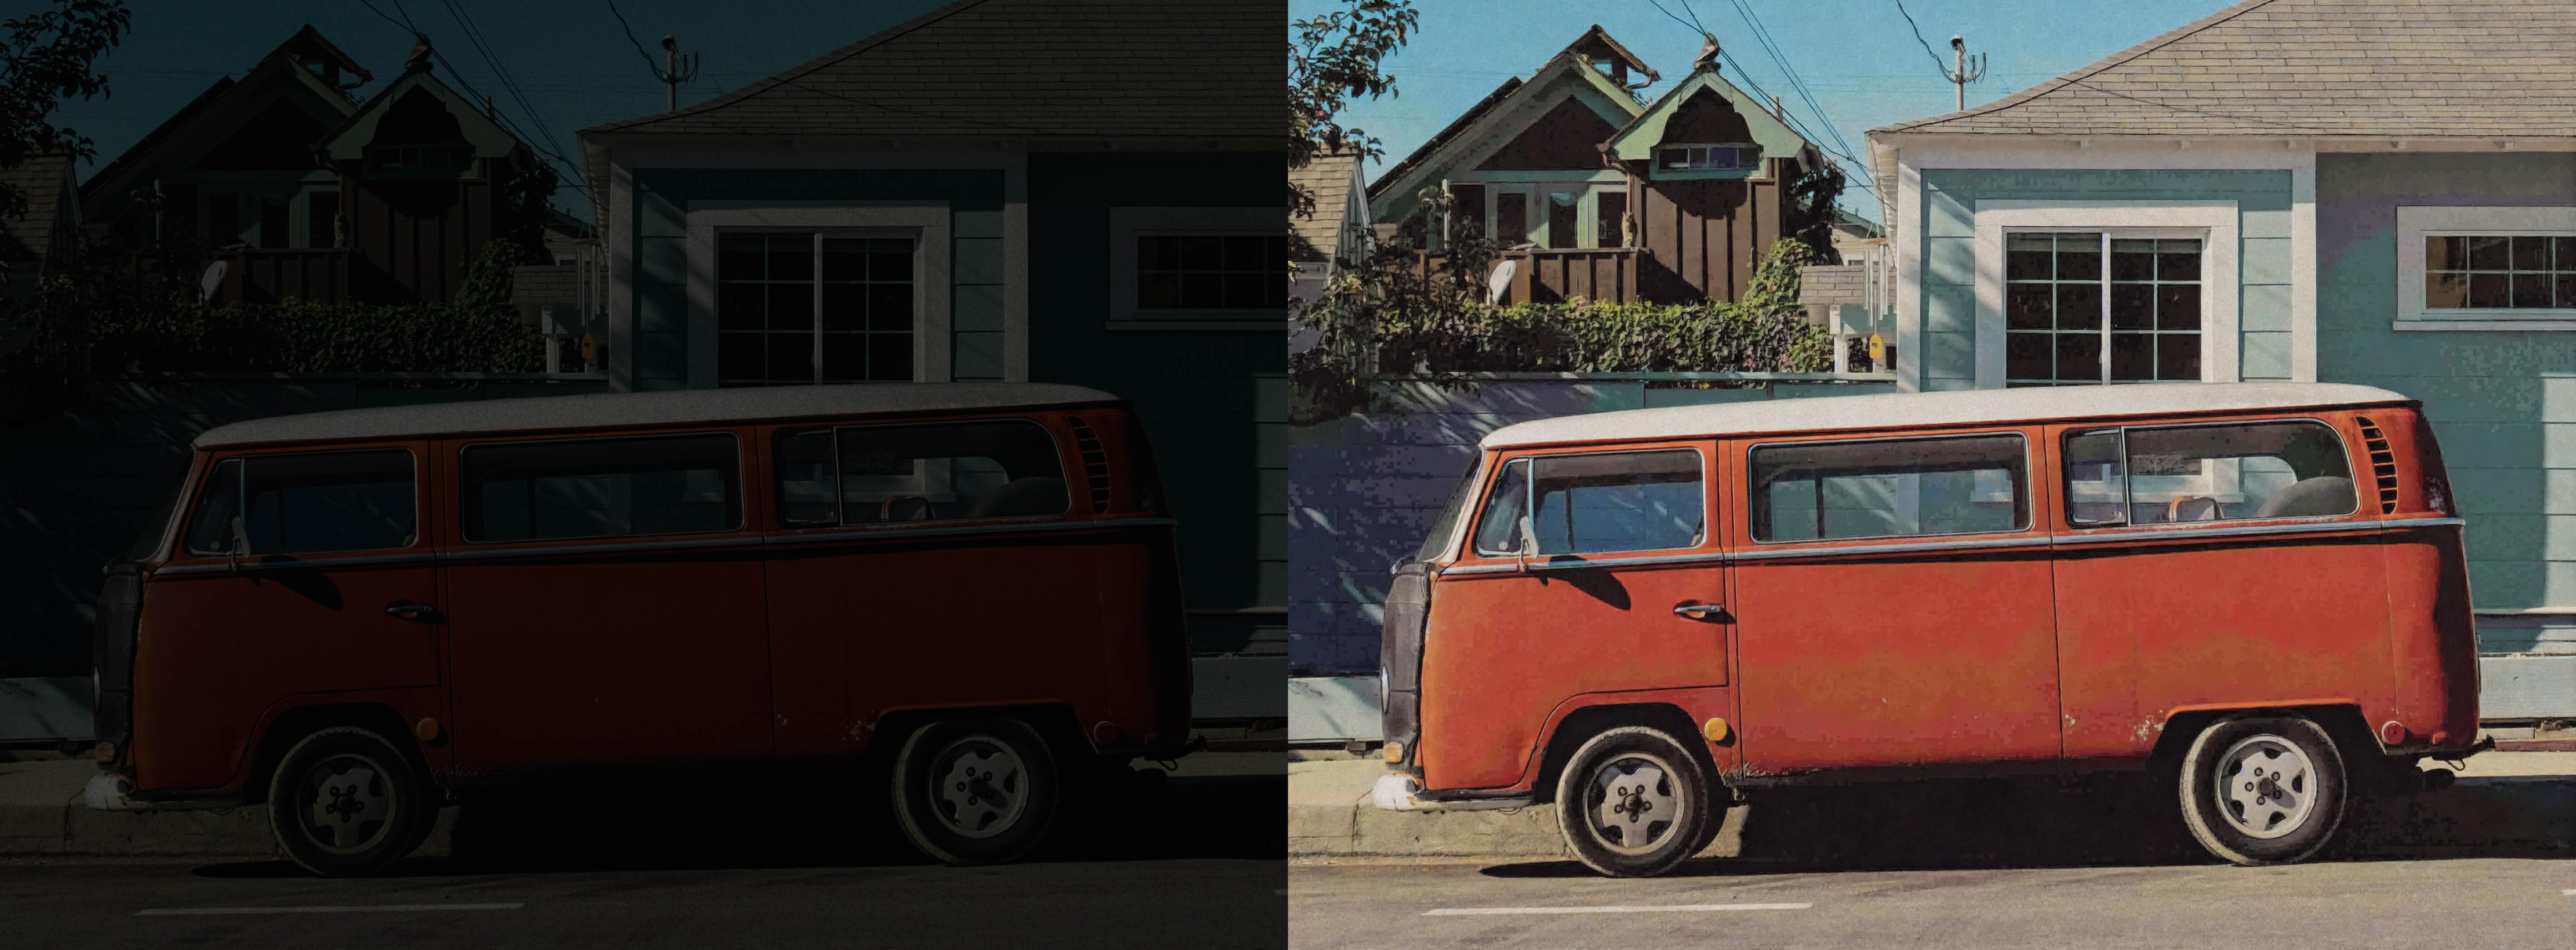


💡 Low light enhancement features:
• Intelligently brightens dark regions
• Preserves natural color tones
• Reduces noise while enhancing details
• Avoids overexposure of already bright areas


In [4]:
# Low light enhancement demonstration
result = run_demo_and_display(
    img_path="data/real_demo/lowlight.jpg",
    prompt="Brighten this picture."
)

print("\n💡 Low light enhancement features:")
print("• Intelligently brightens dark regions")
print("• Preserves natural color tones")
print("• Reduces noise while enhancing details")
print("• Avoids overexposure of already bright areas")

## Single Distortion Removal - Rain Streak Removal

Let's remove rain streaks from a photo. The system can handle weather-related distortions effectively.


🚀 Running: demo_nlp.py --img_path data/real_demo/rain.jpg --prompt "I would like to get rid of the rain streaks in this photo."
STDOUT: 🎯 Natural Language Image Restoration Demo
📝 Input prompt: 'I would like to get rid of the rain streaks in this photo.'
✅ Mapped to distortion type: derain

🚀 Running inference with command:
python infer.py --unified_checkpoint_path pre-trained/unified_checkpoint.pt --distortion_type derain --img_path data/real_demo/rain.jpg --save_root demo_results --num_inference_steps 20 --seed 42 --clip_path pre-trained/clip_vision_model.pt

Processing derain distortion...
Using unified checkpoint loading...
Loading unified checkpoint from: pre-trained/unified_checkpoint.pt
Loading CLIP model from .pt file: pre-trained/clip_vision_model.pt
Successfully loaded CLIP model from .pt file
✓ Successfully loaded derain models from unified checkpoint
Running PRISM inference...
Processing complete!
  - Distortion type: derain
  - Input: data/real_demo/rain.jpg
  - Output: d

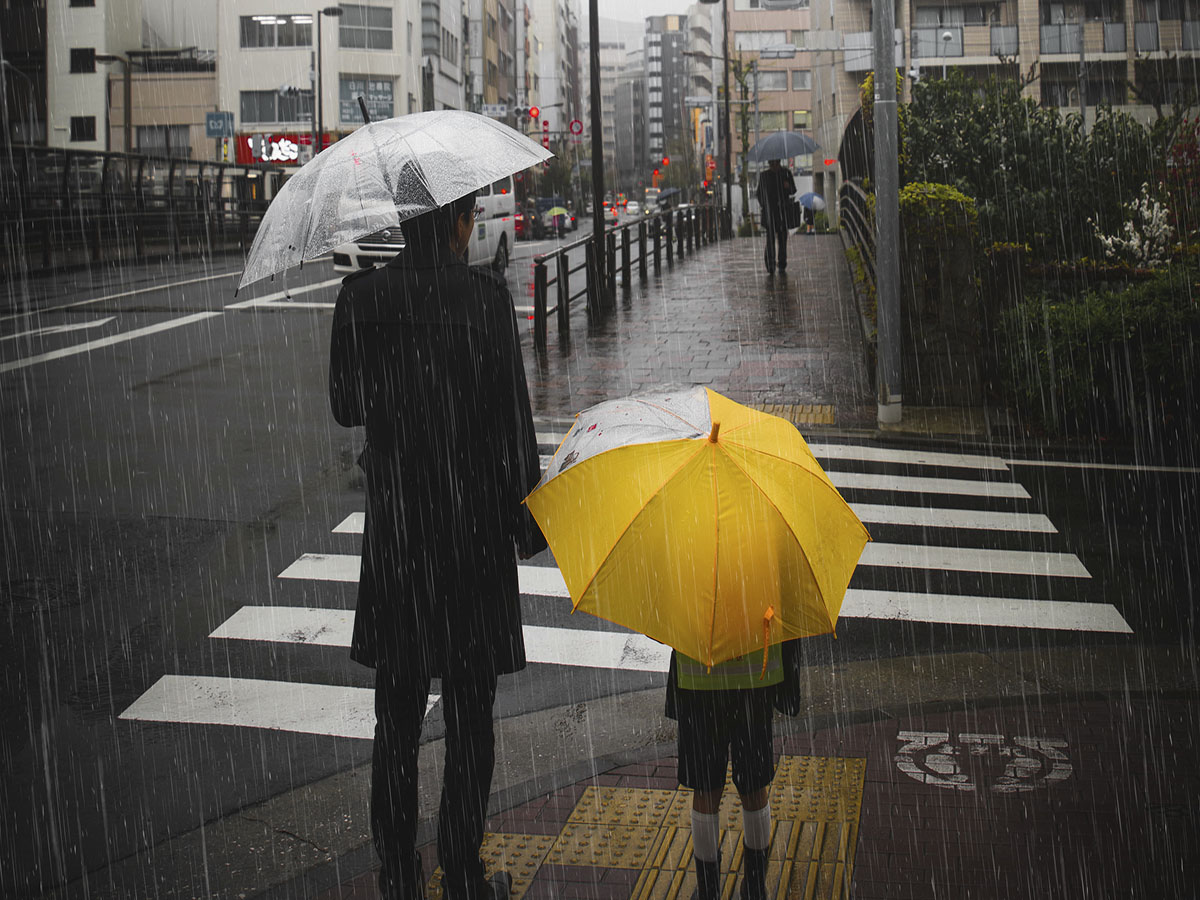


✨ Restored Image: demo_results/derain_rain.jpg


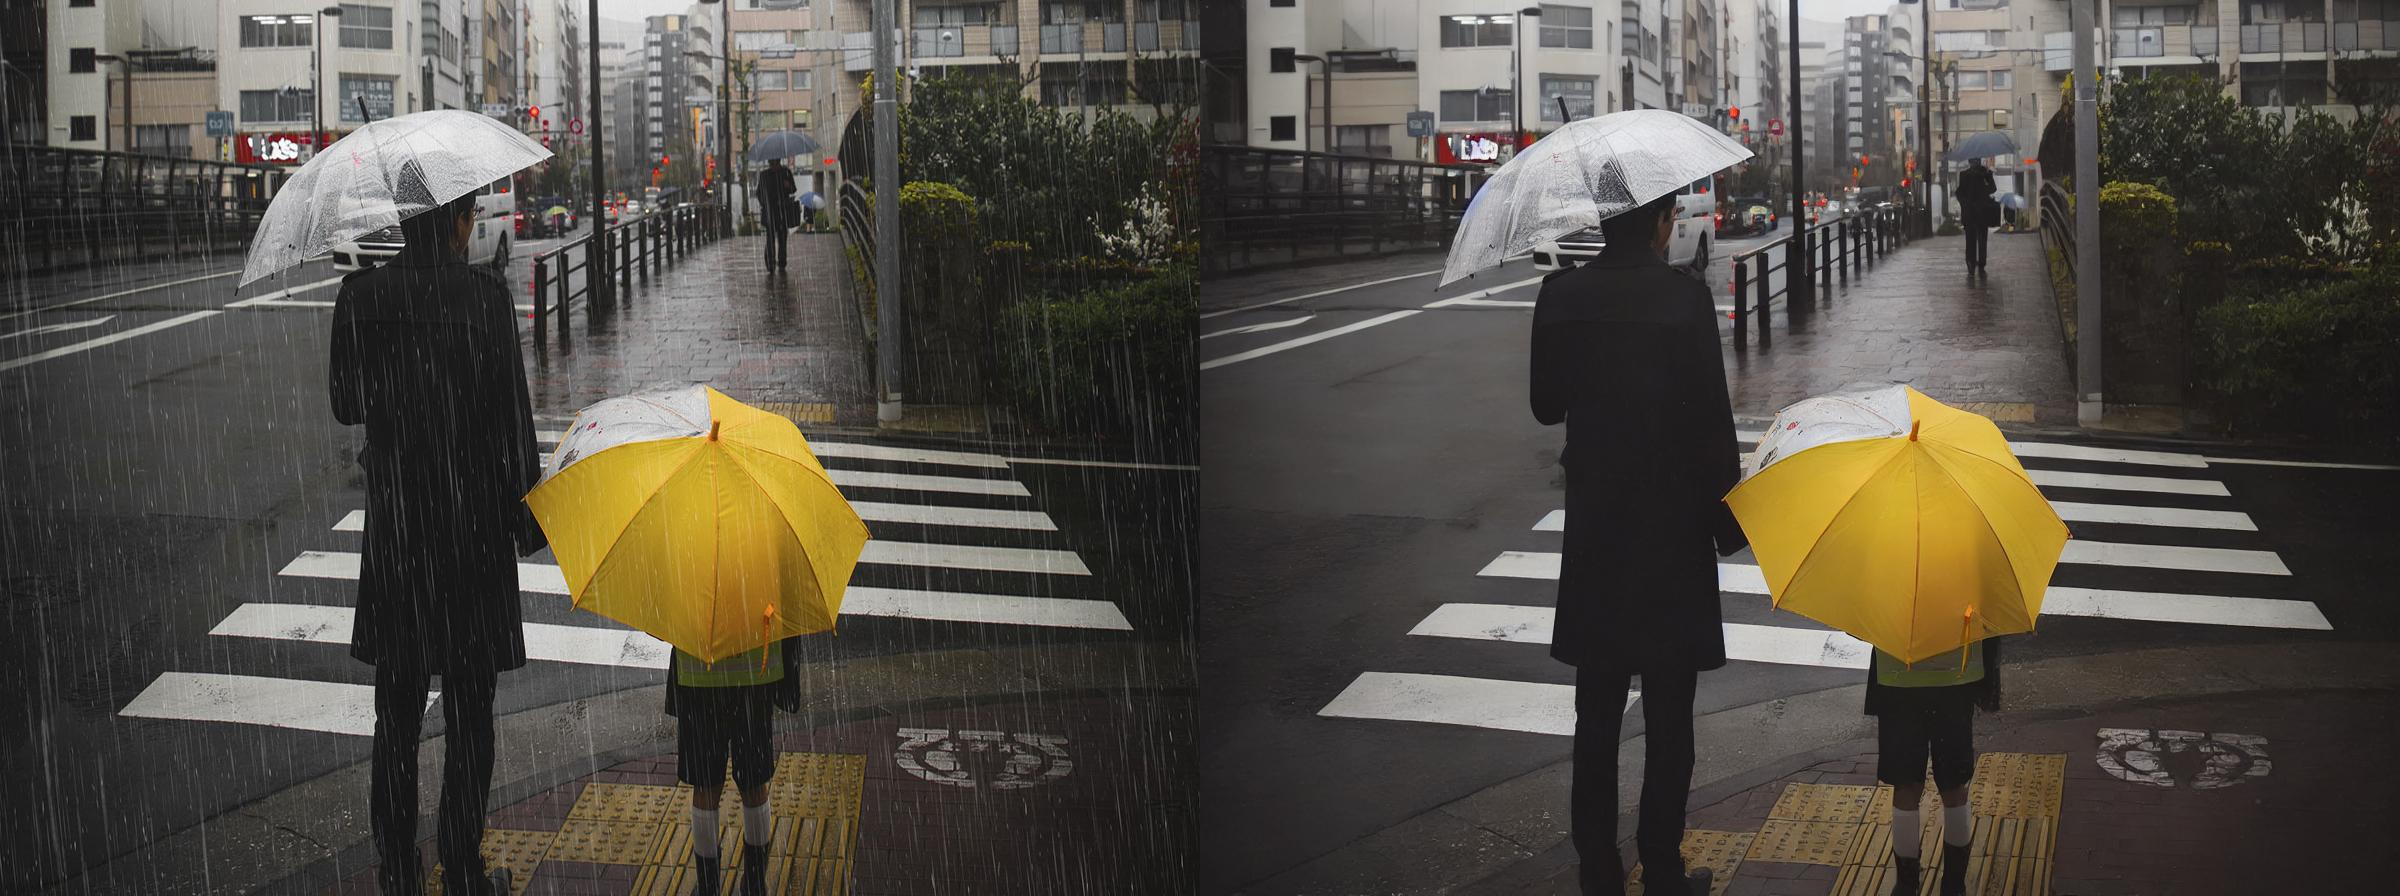


🌧️ Rain removal capabilities:
• Detects and removes rain streaks of various orientations
• Preserves background details and textures
• Handles both heavy and light rain conditions
• Maintains image sharpness and clarity


In [5]:
# Rain streak removal demonstration
result = run_demo_and_display(
    img_path="data/real_demo/rain.jpg",
    prompt="I would like to get rid of the rain streaks in this photo."
)

print("\n🌧️ Rain removal capabilities:")
print("• Detects and removes rain streaks of various orientations")
print("• Preserves background details and textures")
print("• Handles both heavy and light rain conditions")
print("• Maintains image sharpness and clarity")

## Controllable Restoration - Sequential Processing

Now let's explore the controllability of our method. We'll start with an image that has both haze and snow, but first remove only the snow. This demonstrates fine-grained control over the restoration process.


🚀 Running: demo_nlp.py --img_path data/real_demo/dehaze_desnow.jpg --prompt "Desnow this image."
STDOUT: 🎯 Natural Language Image Restoration Demo
📝 Input prompt: 'Desnow this image.'
✅ Mapped to distortion type: desnow

🚀 Running inference with command:
python infer.py --unified_checkpoint_path pre-trained/unified_checkpoint.pt --distortion_type desnow --img_path data/real_demo/dehaze_desnow.jpg --save_root demo_results --num_inference_steps 20 --seed 42 --clip_path pre-trained/clip_vision_model.pt

Processing desnow distortion...
Using unified checkpoint loading...
Loading unified checkpoint from: pre-trained/unified_checkpoint.pt
Loading CLIP model from .pt file: pre-trained/clip_vision_model.pt
Successfully loaded CLIP model from .pt file
✓ Successfully loaded desnow models from unified checkpoint
Running PRISM inference...
Processing complete!
  - Distortion type: desnow
  - Input: data/real_demo/dehaze_desnow.jpg
  - Output: demo_results/desnow_dehaze_desnow.jpg

🎉 Success! Chec

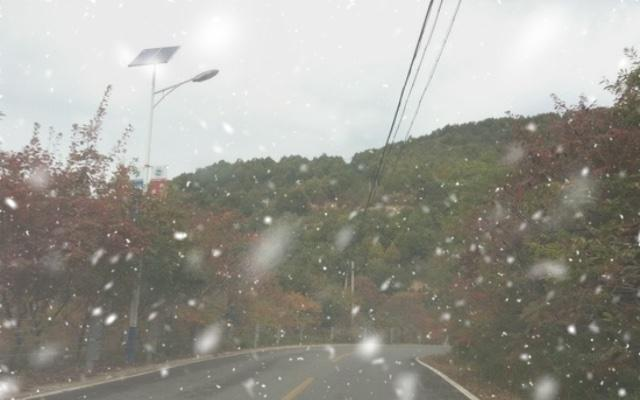


✨ Restored Image: demo_results/desnow_dehaze_desnow.jpg


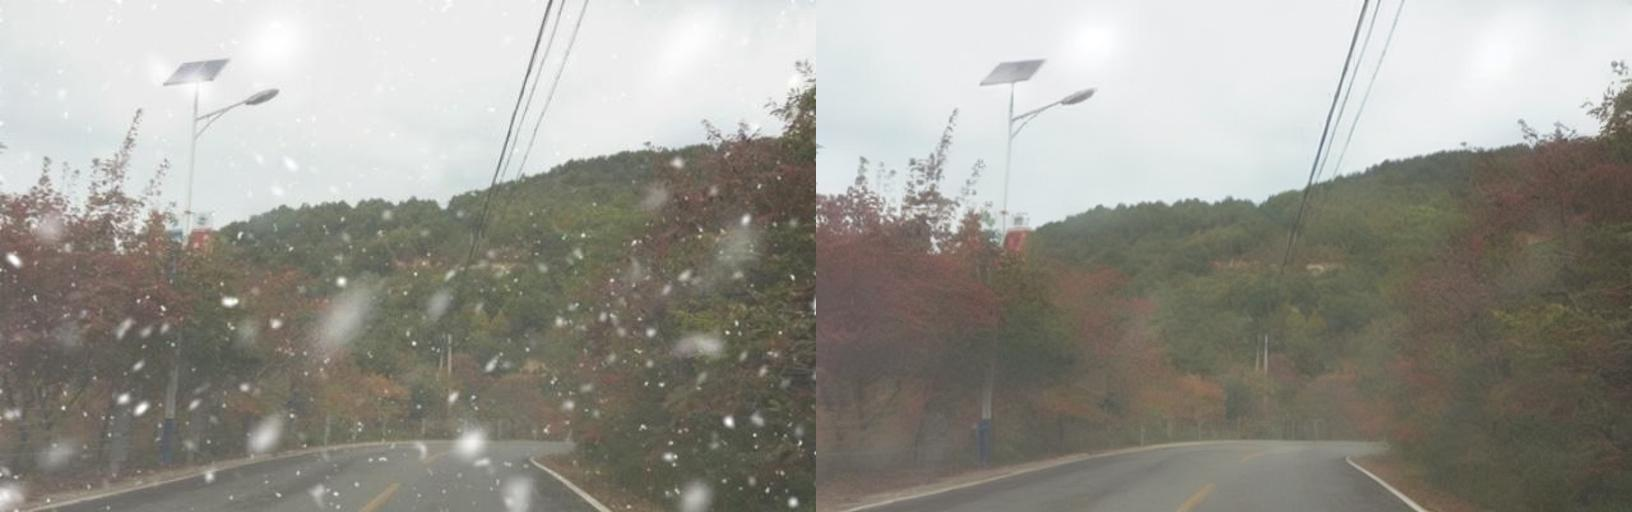


🎯 Controllable restoration benefits:
• Allows selective restoration of specific distortions
• Enables iterative refinement of results
• Provides user control over the restoration process
• Useful when you want to address distortions one at a time

⏭️ In the next cell, we'll take this desnowed result and remove the remaining haze.


In [10]:
# Step 1: Remove snow from an image with both haze and snow
result = run_demo_and_display(
    img_path="data/real_demo/dehaze_desnow.jpg",
    prompt="Desnow this image."
)

print("\n🎯 Controllable restoration benefits:")
print("• Allows selective restoration of specific distortions")
print("• Enables iterative refinement of results") 
print("• Provides user control over the restoration process")
print("• Useful when you want to address distortions one at a time")
print("\n⏭️ In the next cell, we'll take this desnowed result and remove the remaining haze.")

## Extract and Process Intermediate Results

Now let's take the output from the previous step and apply dehazing to complete the restoration process. This shows how you can chain restoration operations.

📁 Using intermediate result: demo_results/desnow_dehaze_desnow.jpg

🚀 Running: demo_nlp.py --img_path demo_results/desnow_dehaze_desnow.jpg --prompt "Now, dehaze."
STDOUT: 🎯 Natural Language Image Restoration Demo
📝 Input prompt: 'Now, dehaze.'
✅ Mapped to distortion type: dehaze

🚀 Running inference with command:
python infer.py --unified_checkpoint_path pre-trained/unified_checkpoint.pt --distortion_type dehaze --img_path demo_results/desnow_dehaze_desnow.jpg --save_root demo_results --num_inference_steps 20 --seed 42 --clip_path pre-trained/clip_vision_model.pt

Processing dehaze distortion...
Using unified checkpoint loading...
Loading unified checkpoint from: pre-trained/unified_checkpoint.pt
Loading CLIP model from .pt file: pre-trained/clip_vision_model.pt
Successfully loaded CLIP model from .pt file
✓ Successfully loaded dehaze models from unified checkpoint
Running PRISM inference...
Processing complete!
  - Distortion type: dehaze
  - Input: demo_results/desnow_dehaze_desnow.

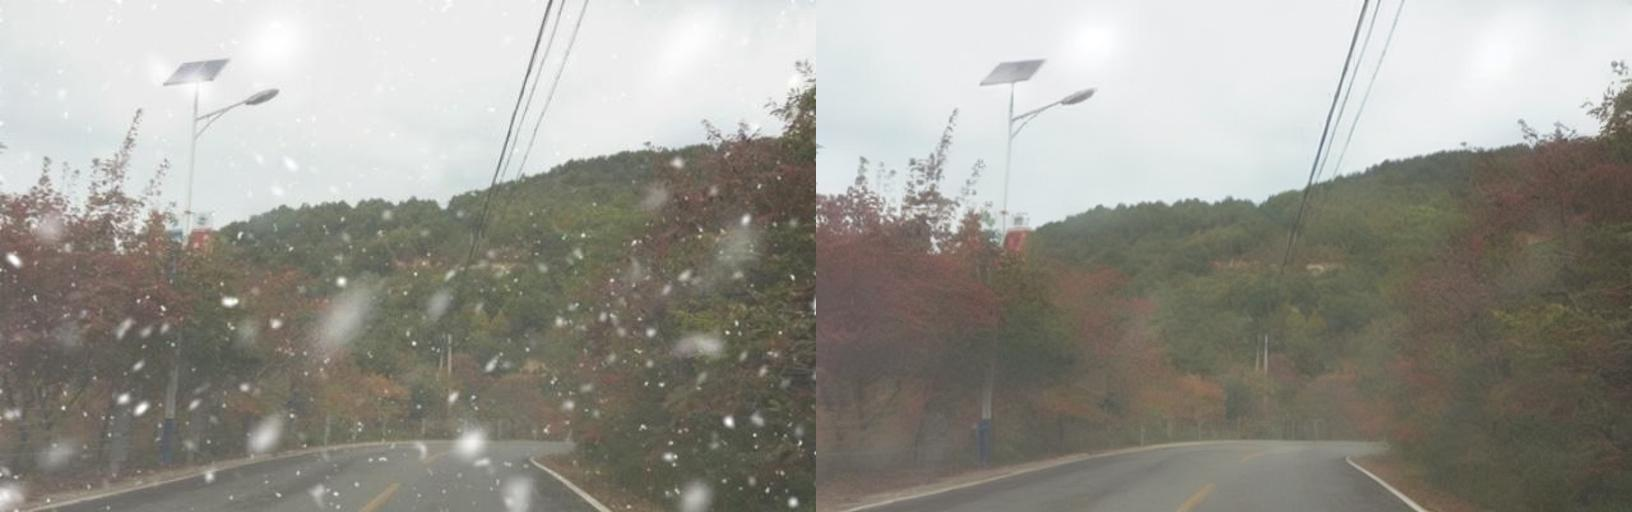


✨ Restored Image: demo_results/dehaze_desnow_dehaze_desnow.jpg


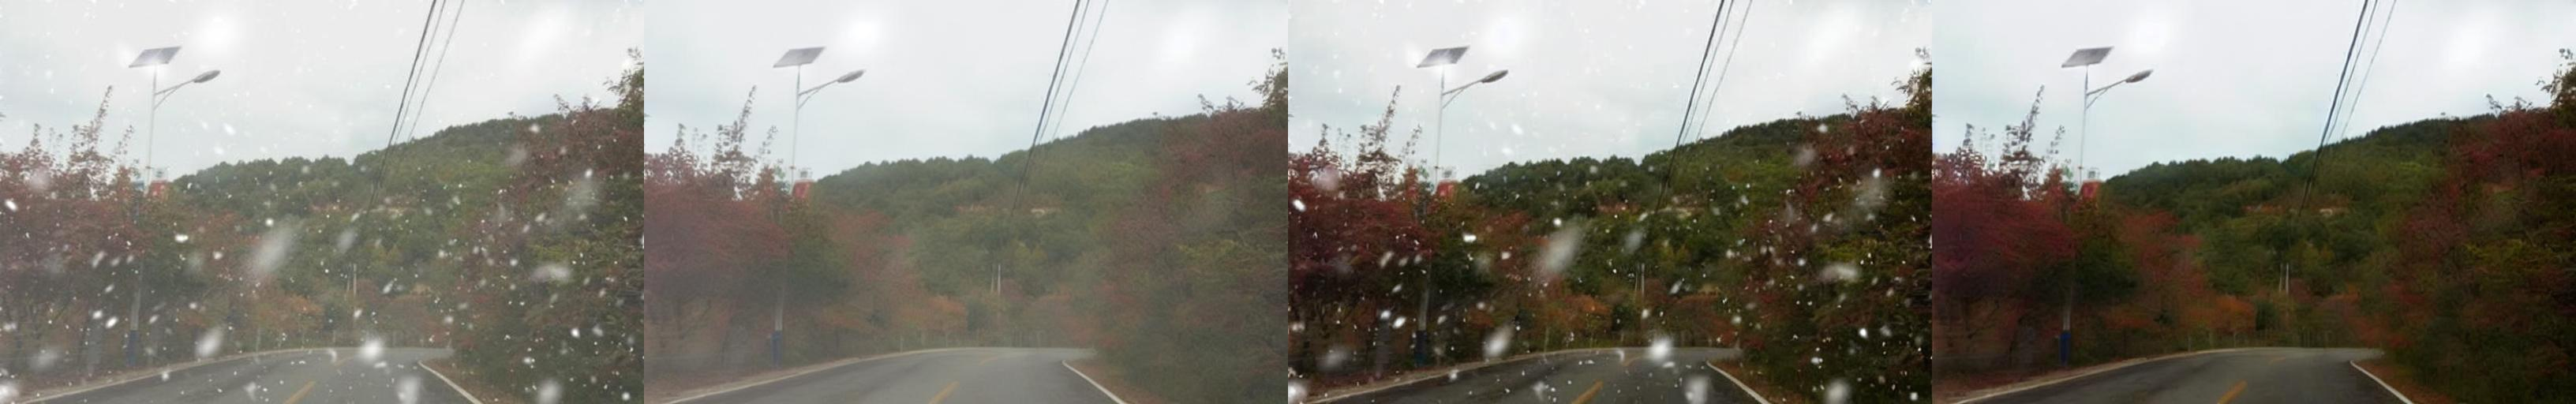


🔄 Sequential processing achieved:
1. ❄️ First step: Removed snow while preserving haze
2. 🌫️ Second step: Removed haze from the desnowed result
3. ✨ Final result: Clean image with both distortions removed


In [ ]:
# Step 2: Find the most recent output and apply dehazing
import glob

# Find the most recent output file from the previous step
output_files = glob.glob("demo_results/*.png") + glob.glob("demo_results/*.jpg")
if output_files:
    latest_output = max(output_files, key=os.path.getctime)
    print(f"📁 Using intermediate result: {latest_output}")
    
    # Now remove the haze from the desnowed image
    result = run_demo_and_display(
        img_path=latest_output,
        prompt="Now, dehaze."
    )
    
    print("\n🔄 Sequential processing achieved:")
    print("1. ❄️ First step: Removed snow while preserving haze")
    print("2. 🌫️ Second step: Removed haze from the desnowed result")
    print("3. ✨ Final result: Clean image with both distortions removed")
else:
    print("No intermediate results found. Run the previous cell first!")

## Real World Composites - Underwater Enhancement

Let's see how this extends to real world composites. Underwater images often suffer from low contrast and color distortion due to water's optical properties.


🚀 Running: demo_nlp.py --img_path data/real_demo/low_contrast_color.png --prompt "Enhance the colors in the image."
STDOUT: 🎯 Natural Language Image Restoration Demo
📝 Input prompt: 'Enhance the colors in the image.'
✅ Mapped to distortion type: low_contrast_color

🚀 Running inference with command:
python infer.py --unified_checkpoint_path pre-trained/unified_checkpoint.pt --distortion_type low_contrast_color --img_path data/real_demo/low_contrast_color.png --save_root demo_results --num_inference_steps 20 --seed 42 --clip_path pre-trained/clip_vision_model.pt

Processing low_contrast_color distortion...
Using unified checkpoint loading...
Loading unified checkpoint from: pre-trained/unified_checkpoint.pt
Loading CLIP model from .pt file: pre-trained/clip_vision_model.pt
Successfully loaded CLIP model from .pt file
✓ Successfully loaded low_contrast_color models from unified checkpoint
Running PRISM inference...
Processing complete!
  - Distortion type: low_contrast_color
  - Input: d

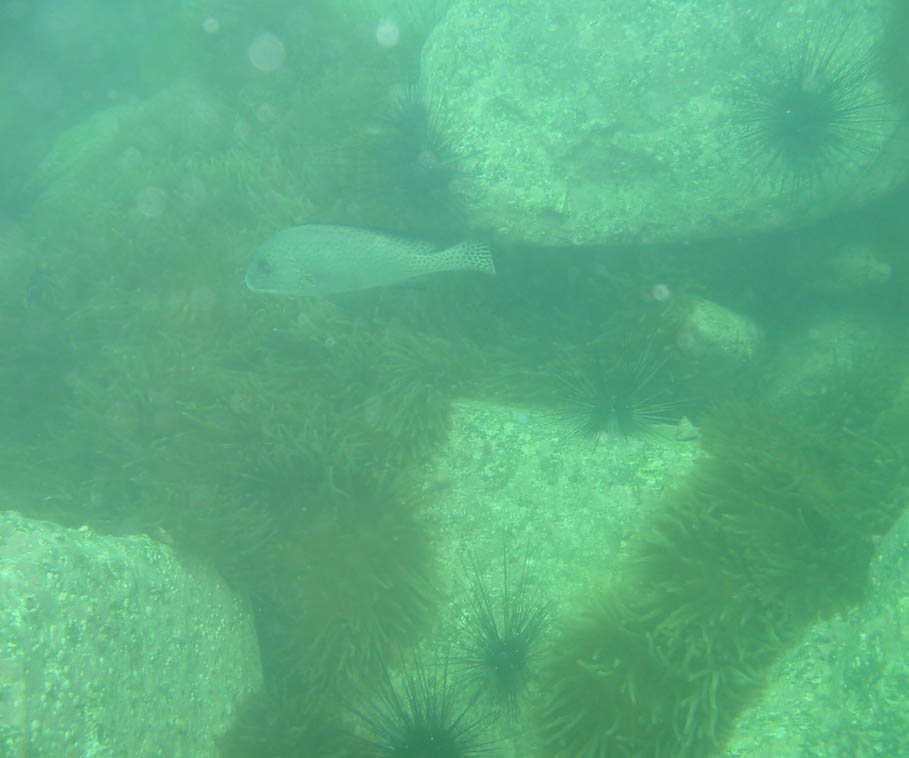


✨ Restored Image: demo_results/low_contrast_color_low_contrast_color.png


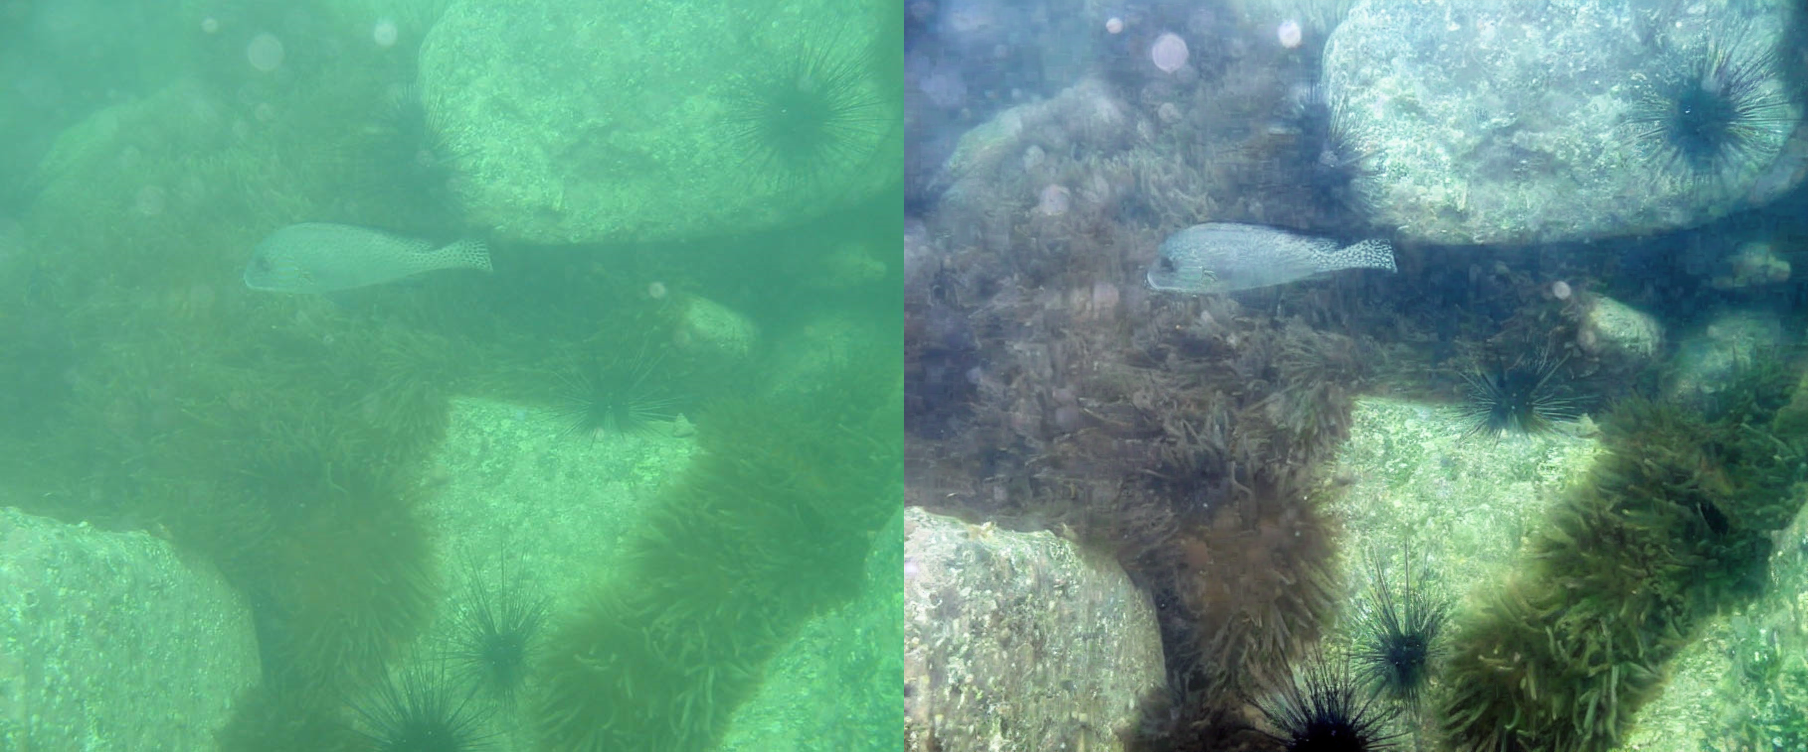


🌊 Underwater enhancement features:
• Corrects color cast caused by water absorption
• Enhances contrast for better visibility
• Restores natural color balance
• Improves overall image clarity and vibrancy
• Handles complex lighting conditions underwater


In [8]:
# Underwater image enhancement
result = run_demo_and_display(
    img_path="data/real_demo/low_contrast_color.png",
    prompt="Enhance the colors in the image."
)

print("\n🌊 Underwater enhancement features:")
print("• Corrects color cast caused by water absorption")
print("• Enhances contrast for better visibility")
print("• Restores natural color balance")
print("• Improves overall image clarity and vibrancy")
print("• Handles complex lighting conditions underwater")

## Real World Composites - Geometric Distortion Removal

Pool images also often suffer from geometric distortion due to refraction. Our system can handle this complex restoration task without modeling any of the physics!


🚀 Running: demo_nlp.py --img_path data/real_demo/unwarp_unrefract.png --prompt "Can you remove the geometric distortion underwater from this pool photo?"
STDOUT: 🎯 Natural Language Image Restoration Demo
📝 Input prompt: 'Can you remove the geometric distortion underwater from this pool photo?'
✅ Mapped to distortion type: unwarp_unrefract

🚀 Running inference with command:
python infer.py --unified_checkpoint_path pre-trained/unified_checkpoint.pt --distortion_type unwarp_unrefract --img_path data/real_demo/unwarp_unrefract.png --save_root demo_results --num_inference_steps 20 --seed 42 --clip_path pre-trained/clip_vision_model.pt

Processing unwarp_unrefract distortion...
Using unified checkpoint loading...
Loading unified checkpoint from: pre-trained/unified_checkpoint.pt
Loading CLIP model from .pt file: pre-trained/clip_vision_model.pt
Successfully loaded CLIP model from .pt file
✓ Successfully loaded unwarp_unrefract models from unified checkpoint
Running PRISM inference...
Proce

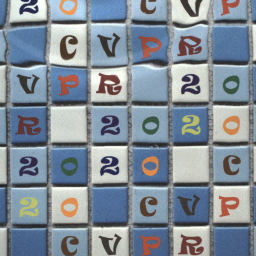


✨ Restored Image: demo_results/unwarp_unrefract_unwarp_unrefract.png


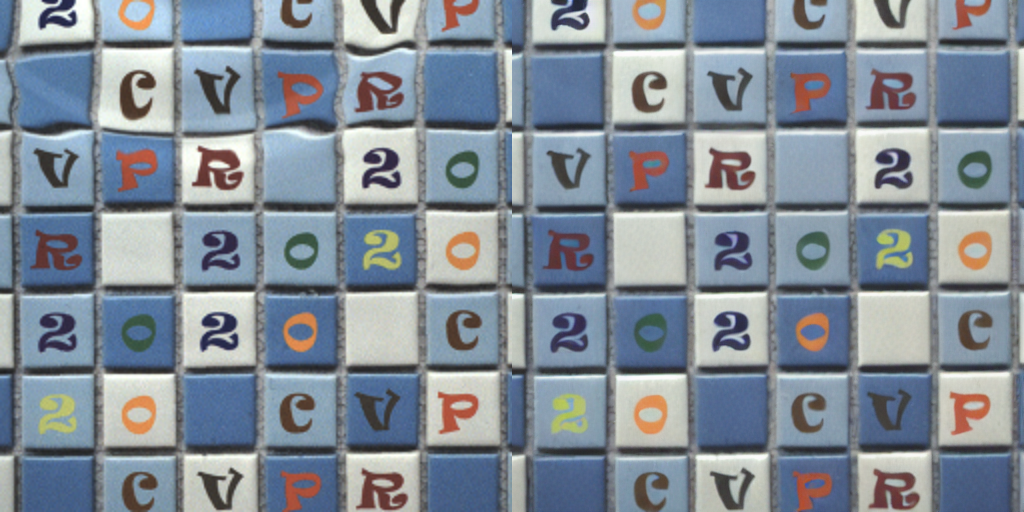


🔧 Geometric distortion correction:
• Corrects warping caused by water refraction
• Restores proper perspective and proportions
• Handles complex underwater optics
• Maintains image quality during geometric correction
• Useful for underwater photography and scientific imaging


In [8]:
# Geometric distortion removal from underwater pool photo
result = run_demo_and_display(
    img_path="data/real_demo/unwarp_unrefract.png",
    prompt="Can you remove the geometric distortion underwater from this pool photo?"
)

print("\n🔧 Geometric distortion correction:")
print("• Corrects warping caused by water refraction")
print("• Restores proper perspective and proportions")
print("• Handles complex underwater optics")
print("• Maintains image quality during geometric correction")
print("• Useful for underwater photography and scientific imaging")

## Real World Composites - Aerial Photo Enhancement

Finally, let's test a complex aerial photo enhancement that combines cloud removal with brightness enhancement. What if you wanted to use custom prompts?


🚀 Running: demo_nlp.py --img_path data/real_demo/cloud_low.jpg --prompt "Remove the clouds and brighten this aerial photo."
STDOUT: 🎯 Natural Language Image Restoration Demo
📝 Input prompt: 'Remove the clouds and brighten this aerial photo.'
✅ Mapped to distortion type: cloud_low

🚀 Running inference with command:
python infer.py --unified_checkpoint_path pre-trained/unified_checkpoint.pt --distortion_type cloud_low --img_path data/real_demo/cloud_low.jpg --save_root demo_results --num_inference_steps 20 --seed 42 --clip_path pre-trained/clip_vision_model.pt

Processing cloud_low distortion...
Using unified checkpoint loading...
Loading unified checkpoint from: pre-trained/unified_checkpoint.pt
Loading CLIP model from .pt file: pre-trained/clip_vision_model.pt
Successfully loaded CLIP model from .pt file
✓ Successfully loaded cloud_low models from unified checkpoint
Running PRISM inference...
Processing complete!
  - Distortion type: cloud_low
  - Input: data/real_demo/cloud_low.jpg
 

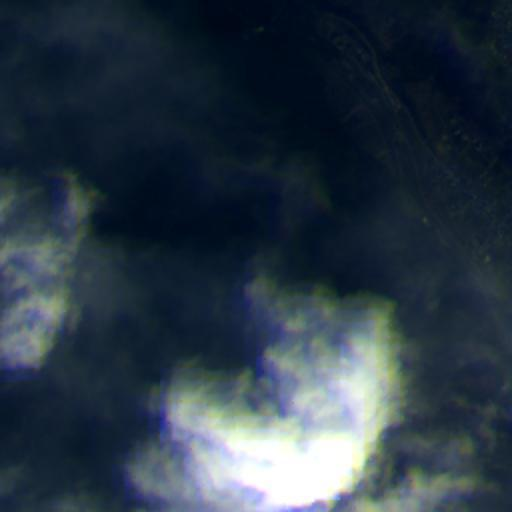


✨ Restored Image: demo_results/cloud_low_cloud_low.jpg


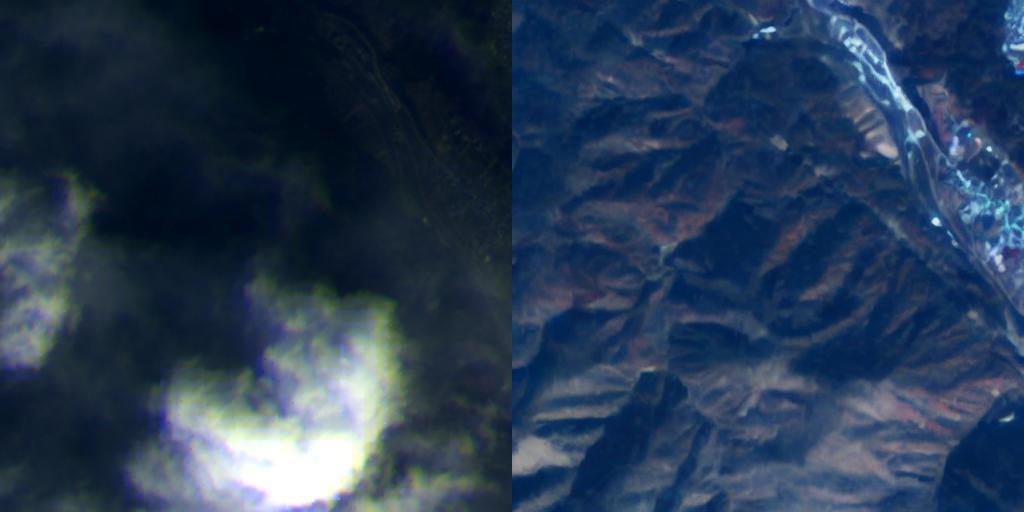


✈️ Aerial photo enhancement:
• Removes cloud coverage to reveal underlying terrain
• Enhances brightness for better visibility
• Balances exposure across the entire scene
• Maintains natural color and contrast
• Perfect for aerial photography and satellite imagery

🎊 Demonstration Complete!
We've shown that our natural language image restoration system can:
✅ Handle single distortions with natural prompts
✅ Support controllable, step-by-step restoration
✅ Process multiple distortions simultaneously
✅ Address complex real-world scenarios
✅ Understand diverse natural language expressions

Try experimenting with your own prompts and images!


In [ ]:
# Aerial photo enhancement: remove clouds and brighten
result = run_demo_and_display(
    img_path="data/real_demo/cloud_low.jpg",  # Using the correct file for this task
    prompt="Remove the clouds and brighten this aerial photo."
)

print("\n✈️ Aerial photo enhancement:")
print("• Removes cloud coverage to reveal underlying terrain")
print("• Enhances brightness for better visibility")
print("• Balances exposure across the entire scene")
print("• Maintains natural color and contrast")
print("• Perfect for aerial photography and satellite imagery")

print("Demonstration Complete!")
print("We've shown that our natural language image restoration system can:")
print("Handle single distortions with natural prompts")
print("Support controllable, step-by-step restoration")  
print("✅ Process multiple distortions simultaneously")
print("✅ Address complex real-world scenarios")
print("✅ Understand diverse natural language expressions")
print("\nTry experimenting with your own prompts and images!")